# First Attempt At EDA

The primary focus of this document is to explore the data and understand the data. This is the first step in the data science process. We also used this document to produce some visualizations for this model.

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv('./data/labeled_headlines_10k.csv')

In [16]:
df.head()

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,cleaned_title,dominant_topic,Predicted_Sentiment
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[],Can artificial intelligence replace small talk?,"(2, 0.7984908)",neutral
1,Lidé se snadněji svěří chatbotům. Emocionální ...,https://news.google.com/rss/articles/CBMidmh0d...,2023-11-12,iDNES.cz,US,cs,People trust chatbots more easily. Emotional A...,72,13,Sunday,...,https://www.idnes.cz/zpravy/domaci/ai-umela-in...,www.idnes.cz,www,3,cz,118,['Autor'],People trust chatbots more easily. Emotional A...,"(4, 0.57000524)",positive
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[],How to implement AI in online commerce?,"(2, 0.30003065)",neutral
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[],"Controlling AI: Be careful, AI! | ZEIT ONLINE","(0, 0.83883363)",negative
4,Los consejos para ganar la lotería de la Intel...,https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,C5N,US,es,Tips to win the Artificial Intelligence lotter...,45,9,Sunday,...,https://www.c5n.com/sociedad/los-consejos-gana...,www.c5n.com,www,2,com,93,[],Tips to win the Artificial Intelligence lottery,"(3, 0.54555273)",positive


In [17]:
columns_of_interest = ['source', 'country', 'language', "day_of_week", "is_weekend", "is_holiday", "source_type", "top_level_domain"]

### Source Analysis

/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


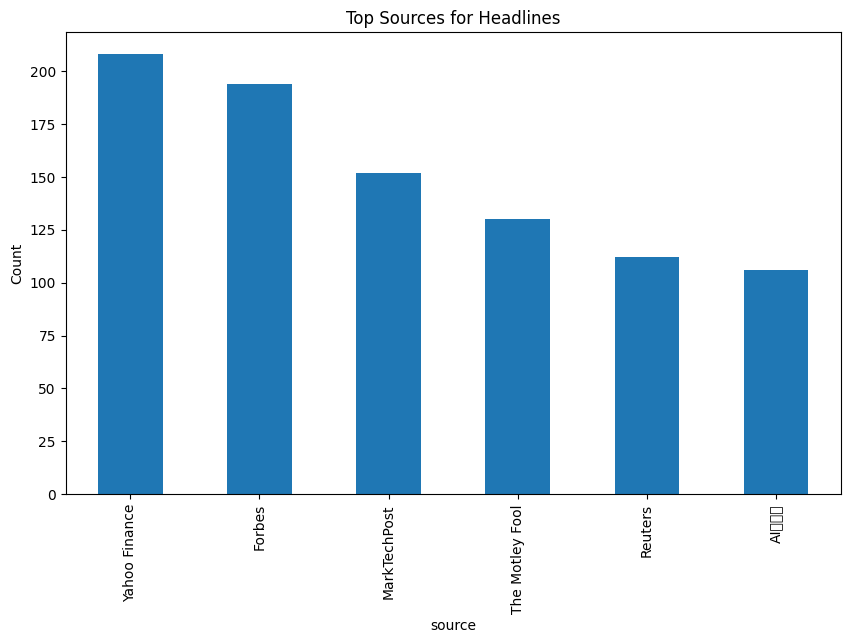

In [18]:
plt.figure(figsize=(10, 6))
filtered_values = df["source"].value_counts()[df["source"].value_counts() > 100]
filtered_values.plot(kind='bar')
plt.title('Top Sources for Headlines')
plt.ylabel('Count')
plt.show()

## Top sources for Headlines Visualization

/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


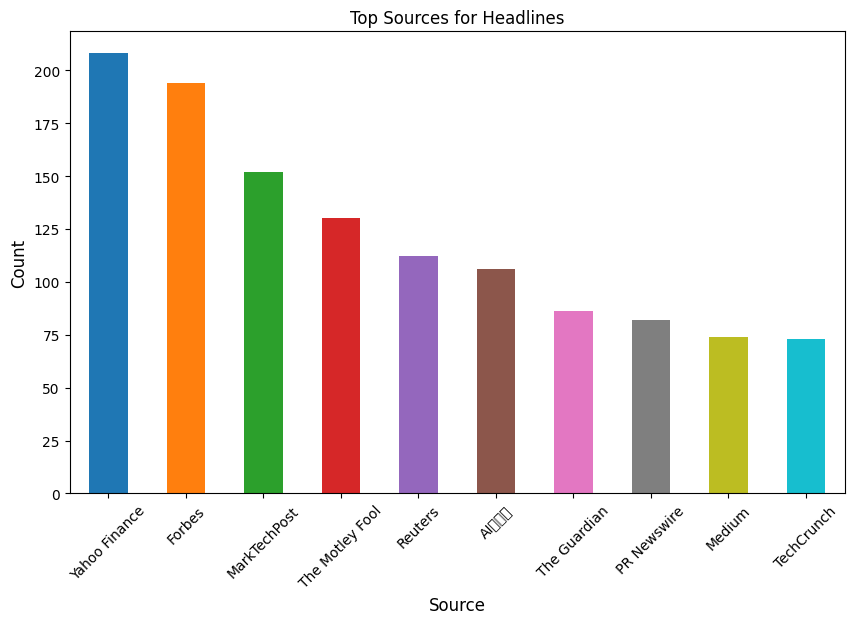

In [32]:
plt.figure(figsize=(10, 6))
filtered_values = df["source"].value_counts()[df["source"].value_counts() > 70]
num_sources = len(filtered_values)
colors = plt.cm.tab10(np.linspace(0, 1, num_sources))
filtered_values.plot(kind='bar', color=colors)
plt.title('Top Sources for Headlines')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  
plt.xlabel('Source', fontsize=12)
plt.show()

## Source Type Distribution

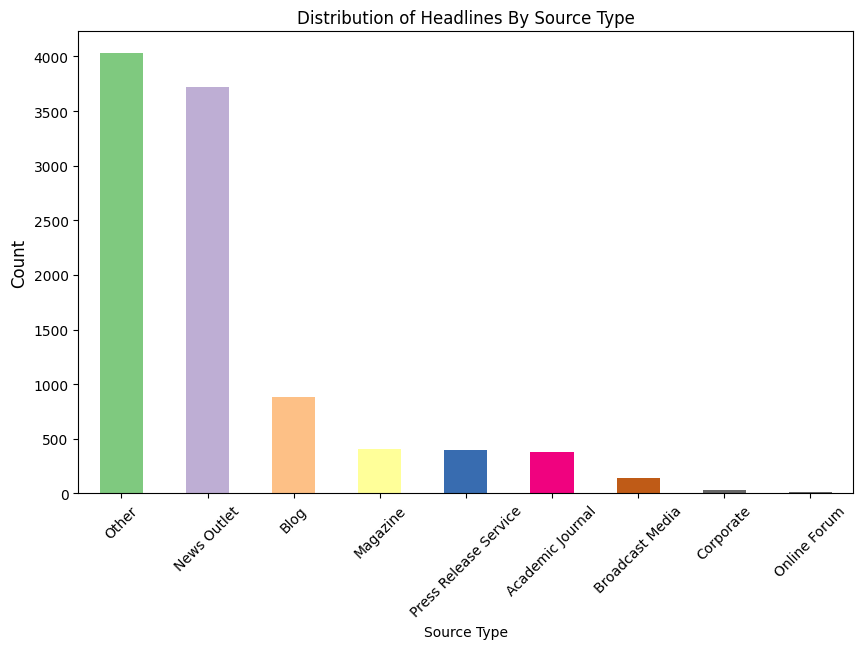

In [27]:
plt.figure(figsize=(10, 6))
df["Source Type"] = df["source_type"]
filtered_values = df["Source Type"].value_counts()
num_sources = len(filtered_values)
colors = plt.cm.Accent(np.linspace(0, 1, num_sources))

filtered_values.plot(kind='bar', color=colors)

plt.title('Distribution of Headlines By Source Type')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)


plt.show()

## Distribution of Headlines By Source

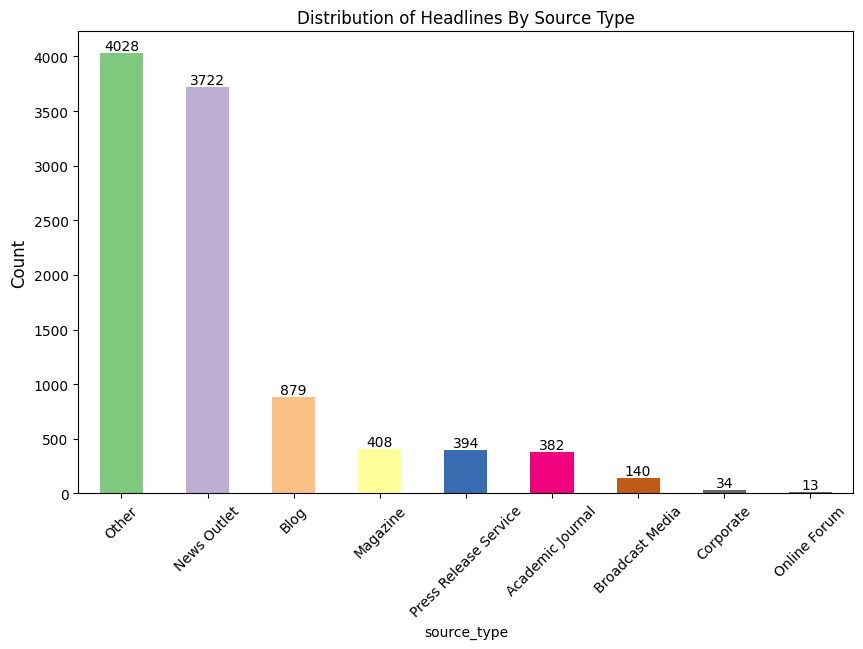

In [21]:
plt.figure(figsize=(10, 6))
filtered_values = df["source_type"].value_counts()
num_sources = len(filtered_values)
colors = plt.cm.Accent(np.linspace(0, 1, num_sources))  # Using tab10 colormap for variety
bars = filtered_values.plot(kind='bar', color=colors)
for bar in bars.patches:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, round(yval, 2), va='bottom', ha='center')
plt.title('Distribution of Headlines By Source Type')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.show()

## Distribution of Headlines by Quarter

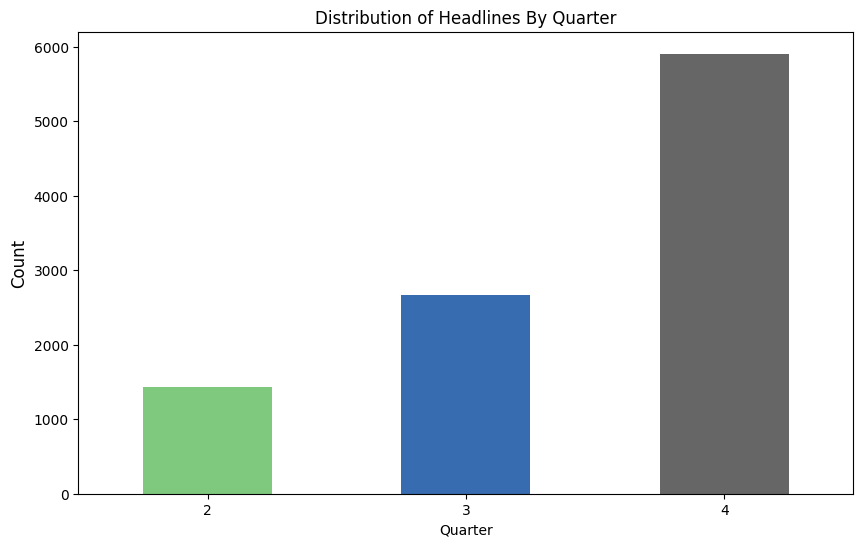

In [26]:
plt.figure(figsize=(10, 6))
df["Quarter"] = df["quarter"]
filtered_values = df["Quarter"].value_counts().sort_index()
num_sources = len(filtered_values)
colors = plt.cm.Accent(np.linspace(0, 1, num_sources))

bars = filtered_values.plot(kind='bar', color=colors)

plt.title('Distribution of Headlines By Quarter')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0)
plt.xticks(rotation=0)

plt.show()

## Visualizations for Zero Shot Sentiment Analysis

In [23]:
df = pd.read_csv('labeled_headlines_10k.csv')

FileNotFoundError: [Errno 2] No such file or directory: 'labeled_headlines_10k.csv'

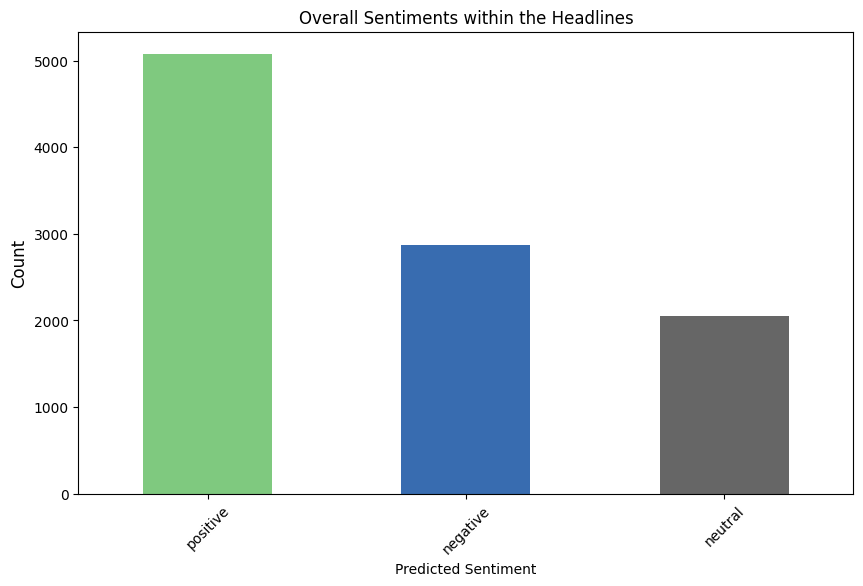

In [29]:
plt.figure(figsize=(10, 6))
df["Predicted Sentiment"] = df["Predicted_Sentiment"]
filtered_values = df["Predicted Sentiment"].value_counts()
num_sources = len(filtered_values)
colors = plt.cm.Accent(np.linspace(0, 1, num_sources))

filtered_values.plot(kind='bar', color=colors)

plt.title('Overall Sentiments within the Headlines')
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=45)


plt.show()

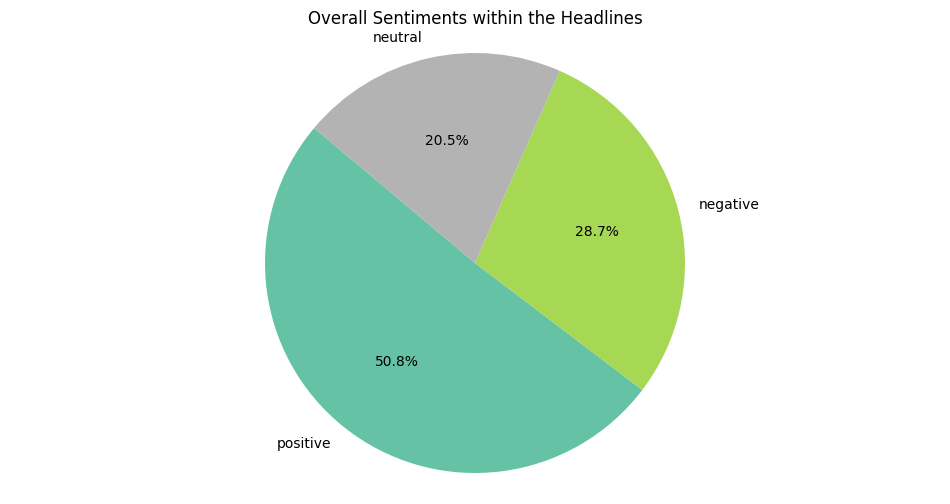

In [31]:
plt.figure(figsize=(12, 6))
df["Predicted Sentiment"] = df["Predicted_Sentiment"]
filtered_values = df["Predicted Sentiment"].value_counts()
labels = filtered_values.index
sizes = filtered_values.values
colors = plt.cm.Set2(np.linspace(0, 1, len(labels)))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Overall Sentiments within the Headlines')
plt.axis('equal')
plt.show()

In [ ]:
p_df = df[df['Predicted_Sentiment'] == 'positive']

In [ ]:
p_df = df[['translated_title', 'Predicted_Sentiment']]

In [ ]:
print(p_df['translated_title'][232])

More than 1 in 3 Thai people have used Generative AI when working and relaxing - bangkokbiznews


In [ ]:
n_df = df[df['Predicted_Sentiment'] == 'negative']

In [ ]:
print(n_df['translated_title'][41])

How to stop AI taking your job and five careers that are doomed to ‘robot takeover,’ expert reveals... - The Sun


In [ ]:
n_df.head(50)

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,cleaned_title,dominant_topic,Predicted_Sentiment
3,"Kontrolle von KI: Vorsicht, KI! | ZEIT ONLINE ...",https://news.google.com/rss/articles/CBMiXWh0d...,2023-11-12,ZEIT ONLINE English,US,de,"Controlling AI: Be careful, AI! | ZEIT ONLINE ...",56,12,Sunday,...,https://www.zeit.de/zeit-wissen/2023/06/kuenst...,www.zeit.de,www,4,de,93,[],"Controlling AI: Be careful, AI! | ZEIT ONLINE","(0, 0.83883363)",negative
5,Valaki feltöltötte Orbán agyát a mesterséges i...,https://news.google.com/rss/articles/CBMifGh0d...,2023-11-12,Nyugati Fény,US,hu,Someone uploaded Orbán's brain to artificial i...,66,10,Sunday,...,https://nyugatifeny.hu/2023/11/12/valaki-felto...,nyugatifeny.hu,nyugatifeny,4,hu,124,[],Someone uploaded Orbán's brain to artificial i...,"(0, 0.8390666)",negative
7,Google está negociando para invertir en la sta...,https://news.google.com/rss/articles/CBMiggFod...,2023-11-12,La Verdad Noticias,US,es,Google is negotiating to invest in the startup...,76,14,Sunday,...,https://laverdadnoticias.com/tecnologia/Google...,laverdadnoticias.com,laverdadnoticias,2,com,130,[],Google is negotiating to invest in the startup...,"(2, 0.712607)",negative
15,"Messi lleva 821 goles, inteligencia artificial...",https://news.google.com/rss/articles/CBMiiAFod...,2023-11-12,El Futbolero España,US,es,"Messi has 821 goals, artificial intelligence c...",81,17,Sunday,...,https://www.elfutbolero.es/jugadores/Messi-lle...,www.elfutbolero.es,www,2,es,136,"['Por', 'De Noviembre', 'Author', 'Date']","Messi has 821 goals, artificial intelligence c...","(4, 0.8661516)",negative
25,Nick Bostrom: Will AI lead to tyranny? - UnHerd,https://news.google.com/rss/articles/CBMiQGh0d...,2023-11-12,UnHerd,US,en,Nick Bostrom: Will AI lead to tyranny? - UnHerd,39,9,Sunday,...,https://unherd.com/2023/11/nick-bostrom-will-a...,unherd.com,unherd,4,com,64,"['Flo Read', 'Nell Clover', 'Douglas Redmayne'...",Nick Bostrom: Will AI lead to tyranny?,"(2, 0.8376483)",negative
28,Read Full SAG-AFTRA Deal Summary Released Ahea...,https://news.google.com/rss/articles/CBMiUGh0d...,2023-11-12,Deadline,US,en,Read Full SAG-AFTRA Deal Summary Released Ahea...,95,18,Sunday,...,https://deadline.com/2023/11/sag-aftra-deal-su...,deadline.com,deadline,4,com,80,['Dominic Patten'],Read Full SAG-AFTRA Deal Summary Released Ahea...,"(3, 0.93821865)",negative
29,Know how AI is being leveraged to launch sophi...,https://news.google.com/rss/articles/CBMiXmh0d...,2023-11-12,The Siasat Daily,US,en,Know how AI is being leveraged to launch sophi...,68,14,Sunday,...,https://www.siasat.com/know-how-ai-is-being-le...,www.siasat.com,www,2,com,94,['Indo-Asian News Service'],Know how AI is being leveraged to launch sophi...,"(4, 0.53067815)",negative
31,On the Record': Artificial Intelligence in the...,https://news.google.com/rss/articles/CBMiVmh0d...,2023-11-12,WPBF West Palm Beach,US,en,On the Record': Artificial Intelligence in the...,68,13,Sunday,...,https://www.wpbf.com/article/on-the-record-art...,www.wpbf.com,www,3,com,86,"['Danielle Scruggs', 'Https', 'Www.Facebook.Com']",On the Record': Artificial Intelligence in the...,"(0, 0.40014142)",negative
35,Biden AI order sparks tug of war over regulati...,https://news.google.com/rss/articles/CBMioQFod...,2023-11-12,Journal Times,US,en,Biden AI order sparks tug of war over regulati...,64,13,Sunday,...,https://journaltimes.com/news/nation-world/gov...,journaltimes.com,journaltimes,5,com,161,"['Gopal Ratnam', 'Cq-Roll Call', 'Chip Somodev...",Biden AI order sparks tug of war over regulati...,"(2, 0.59371066)",negative
40,On Language: A solution for an unnecessary AI ...,https://news.google.com/rss/articles/CBMimAFod...,2023-11-12,Traverse City Record Eagle,US,en,On Language: A solution for an unnecessary AI ...,69,14,Sunday,...,https://www.record-

In [ ]:
ne_df = df[df['Predicted_Sentiment'] == 'neutral']
ne_df.head(50)

,title,link,date,source,country,language,translated_title,number_of_characters_title,number_of_words_title,day_of_week,...,final_redirected_URL,domain_of_URL,subdomain_of_URL,URL_depth,top_level_domain,url_length,author,cleaned_title,dominant_topic,Predicted_Sentiment
0,Kann künstliche Intelligenz Smalltalk ersetzen...,https://news.google.com/rss/articles/CBMiY2h0d...,2023-11-12,Blick,US,de,Can artificial intelligence replace small talk...,47,8,Sunday,...,https://www.blick.ch/schweiz/linguistik-profes...,www.blick.ch,www,2,ch,99,[],Can artificial intelligence replace small talk?,"(2, 0.7984908)",neutral
2,¿Cómo implementar la IA en el comercio online?...,https://news.google.com/rss/articles/CBMicmh0d...,2023-11-12,RRHH Digital,US,es,How to implement AI in online commerce? - Digi...,43,10,Sunday,...,https://www.rrhhdigital.com/secciones/tecnolog...,www.rrhhdigital.com,www,5,com,114,[],How to implement AI in online commerce?,"(2, 0.30003065)",neutral
8,Revolusi Kehidupan Sehari-Hari: Dampak Merata ...,https://news.google.com/rss/articles/CBMifmh0d...,2023-11-12,Kompasiana.com,US,id,Revolution of Everyday Life: The Equivalent Im...,98,14,Sunday,...,https://www.kompasiana.com/bagjarw/65507594edf...,www.kompasiana.com,www,3,com,126,['Rizal Bagja Wiguna'],Revolution of Everyday Life: The Equivalent Im...,"(1, 0.3942525)",neutral
10,La Opinión de Dr. Bartolomé Beltrán | Intelige...,https://news.google.com/rss/articles/CBMiYmh0d...,2023-11-12,Diario de Cádiz,US,es,The Opinion of Dr. Bartolomé Beltrán | Artific...,73,14,Sunday,...,https://www.diariodecadiz.es/opinion/analisis/...,www.diariodecadiz.es,www,3,es,98,['Diario De Cádiz'],The Opinion of Dr. Bartolomé Beltrán | Artific...,"(1, 0.544576)",neutral
12,YouTube annonce des outils IA compatible avec ...,https://news.google.com/rss/articles/CBMibWh0d...,2023-11-12,Cointribune,US,fr,YouTube announces AI tools compatible with its...,58,10,Sunday,...,https://www.cointribune.com/intelligence-artif...,www.cointribune.com,www,2,com,109,['Mikaia Andriamahazoarimanana'],YouTube announces AI tools compatible with its...,"(4, 0.8633164)",neutral
17,Ant Group Dapatkan Izin Pemerintah China untuk...,https://news.google.com/rss/articles/CBMimwFod...,2023-11-12,Kompasiana.com,US,id,Ant Group Gets Chinese Government Permission t...,100,15,Sunday,...,https://www.kompasiana.com/muhihsanpatau8380/6...,www.kompasiana.com,www,3,com,155,['Muh Ihsan Patau'],Ant Group Gets Chinese Government Permission t...,"(0, 0.49167815)",neutral
33,PM Kisan AI Chatbot: पीएम किसान एआई चैटबॉट देग...,https://news.google.com/rss/articles/CBMic2h0d...,2023-11-12,ABP न्यूज़,US,hi,PM Kisan AI Chatbot: PM Kisan AI Chatbot will ...,95,21,Sunday,...,https://www.abplive.com/agriculture/pm-kisan-a...,www.abplive.com,www,2,com,115,"['एब प', 'फ चर ड स क']",PM Kisan AI Chatbot: PM Kisan AI Chatbot will ...,"(4, 0.8468062)",neutral
34,A Inteligência Artificial não é apenas o ChatG...,https://news.google.com/rss/articles/CBMiT2h0d...,2023-11-12,Observador,US,pt,Artificial Intelligence is not just ChatGPT - ...,47,8,Sunday,...,https://observador.pt/opiniao/a-inteligencia-a...,observador.pt,observador,3,pt,79,['Vasco Mendes De Almeida'],Artificial Intelligence is not just ChatGPT,"(4, 0.59461856)",neutral
39,"""Thủ thư AI"" hướng dẫn từ A-Z - Báo Người lao ...",https://news.google.com/rss/articles/CBMiTGh0d...,2023-11-12,Báo Người Lao Động,US,vi,"""AI Librarian"" guides from A-Z - Nguoi Lao Don...",70,15,Sunday,...,https://nld.com.vn/viec-lam/thu-thu-ai-huong-d...,nld.com.vn,nld,2,vn,77,[],"""AI Librarian"" guides from A-Z - Nguoi Lao Don...","(3, 0.8847816)",neutral
48,Is Your Broadband Ready for the AI Revolution?...,https://news.google.com/rss/articles/CBMiRmh0d...,2023-11-12,TechBullion,US,en,Is Your Broadband Ready for the AI Revolution?...,51,10,Sunday,...,https://techbullion.com/is-your-broadband-read...,techbullion.com,techbullion,2,com,70,"['Ahmed Raza', 'Angela Scott-Briggs']",Is Your Broadband Ready for the AI Revolution?,"(1,

## Random Sample of a title

In [ ]:
print(ne_df['translated_title'][80])

The ups and downs of leveraging AI in real estate - Pleasanton Weekly


## Sentiment Counts by Source Type

<Figure size 2880x1728 with 0 Axes>

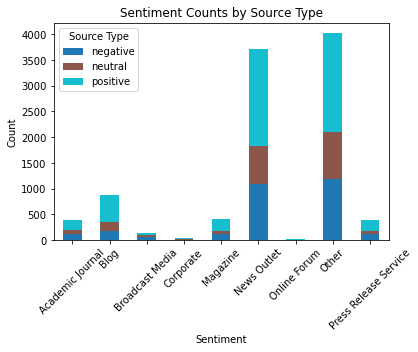

In [ ]:
plt.figure(figsize=(40, 24))

sentiment_counts = df.groupby(['source_type', 'Predicted_Sentiment']).size().unstack()
sentiment_counts.plot(kind='bar', stacked=True, cmap='tab10')
plt.title('Sentiment Counts by Source Type')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Source Type')

plt.show()

## Distribution of Sentiments by Source Type

<Figure size 720x432 with 0 Axes>

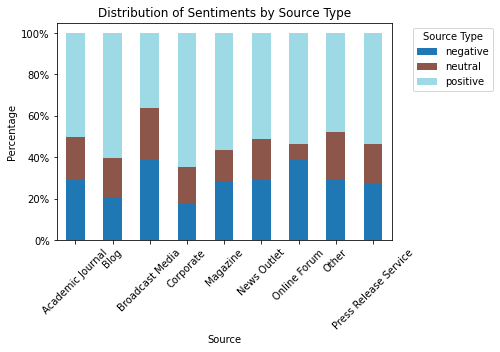

In [ ]:
sentiment_percentages = df.groupby(['source_type', 'Predicted_Sentiment']).size().unstack()
sentiment_percentages = sentiment_percentages.div(sentiment_percentages.sum(axis=1), axis=0) * 100
plt.figure(figsize=(10, 6))
sentiment_percentages.plot(kind='bar', stacked=True, cmap='tab20')
plt.title('Distribution of Sentiments by Source Type')
plt.xlabel('Source')
plt.ylabel('Percentage')
plt.xticks(rotation=45)
plt.legend(title='Source Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{x:.0f}%'))
plt.show()

## Sentiment Distribution for Top Sources

<Figure size 1000x600 with 0 Axes>

/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 53440 (\N{HANGUL SYLLABLE TA}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 51076 (\N{HANGUL SYLLABLE IM}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/Users/arjunrajpal/Documents/GitHub/datathon-breaking-bad-data/.venv/lib/python3.12/site-packages/IPython/core/pylabtools.py:152: UserWarning: Glyph 49828 (\N{HANGUL SYLLABLE SEU}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


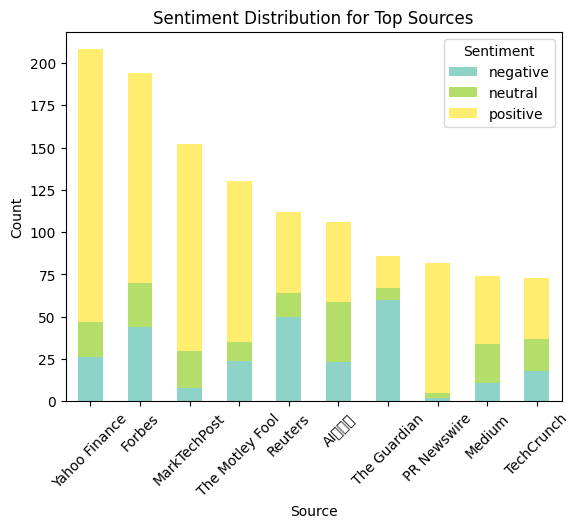

In [34]:
filtered_values = df["source"].value_counts()[df["source"].value_counts() > 70]
top_sources = filtered_values.head(10).index.tolist()
df_top_sources = df[df['source'].isin(top_sources)]
source_counts = df_top_sources['source'].value_counts()
sorted_sources = source_counts.index.tolist()
grouped_data = df_top_sources.groupby(['source', 'Predicted_Sentiment']).size().unstack()


plt.figure(figsize=(10, 6))
grouped_data.loc[sorted_sources].plot(kind='bar', stacked=True, cmap='Set3')
plt.title('Sentiment Distribution for Top Sources')
plt.xlabel('Source')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Sentiment')
plt.show()

## Top 5 sources with highest percentage of positive headlines (>20 headlines)

In [ ]:
filtered_sources = df['source'].value_counts()[df['source'].value_counts() > 20].index.tolist()
df_filtered = df[df['source'].isin(filtered_sources)]

grouped_data = df_filtered.groupby(['source', 'Predicted_Sentiment']).size().unstack()

grouped_data['Positive_Percentage'] = grouped_data['positive'] / grouped_data.sum(axis=1) * 100

sorted_positive_percentage_sources = grouped_data['Positive_Percentage'].sort_values(ascending=False).index.tolist()

top_3_positive_percentage_sources = sorted_positive_percentage_sources[:5]
print("Top 5 sources with highest percentage of positive headlines (>20 headlines):", top_3_positive_percentage_sources)

Top 3 sources with highest percentage of positive headlines (>20 headlines): ['PR Newswire', 'Datanami', 'Business Wire', 'GlobeNewswire', 'Voicebot.ai']


## Top 5 sources with highest percentage of negative headlines (>20 headlines)

In [ ]:
grouped_data['Negative_Percentage'] = grouped_data['negative'] / grouped_data.sum(axis=1) * 100

sorted_negative_percentage_sources = grouped_data['Negative_Percentage'].sort_values(ascending=False).index.tolist()

top_3_negative_percentage_sources = sorted_negative_percentage_sources[:5]

print("Top 5 sources with highest percentage of negative headlines (>20 headlines):", top_3_negative_percentage_sources)

Top 3 sources with highest percentage of negative headlines (>20 headlines): ['The Guardian', 'Reuters', 'Fortune', 'Business Insider', 'Financial Times']


## Top 5 sources with highest percentage of neutral headlines (>20 headlines)

In [ ]:
grouped_data['Neutral_Percentage'] = grouped_data['neutral'] / grouped_data.sum(axis=1) * 100
sorted_neutral_percentage_sources = grouped_data['Neutral_Percentage'].sort_values(ascending=False).index.tolist()
top_3_neutral_percentage_sources = sorted_neutral_percentage_sources[:5]

print("Top 5 sources with highest percentage of neutral headlines (>20 headlines):", top_3_neutral_percentage_sources)

Top 3 sources with highest percentage of neutral headlines (>20 headlines): ['AI타임스', 'The Verge', 'Unite.AI', 'Medium', 'TechCrunch']


## Top 3 neutral sources

In [ ]:
df_neutral = df[df['Predicted_Sentiment'] == 'neutral']
neutral_source_counts = df_neutral['source'].value_counts()
sorted_neutral_sources = neutral_source_counts.index.tolist()
top_3_neutral_sources = sorted_neutral_sources[:8]
print("Top 5 neutral sources:", top_3_neutral_sources)

Top 3 neutral sources: ['AI타임스', 'Forbes', 'The Verge', 'Medium', 'MarkTechPost', 'Yahoo Finance', 'TechCrunch', 'Unite.AI']
